### Задача 1.

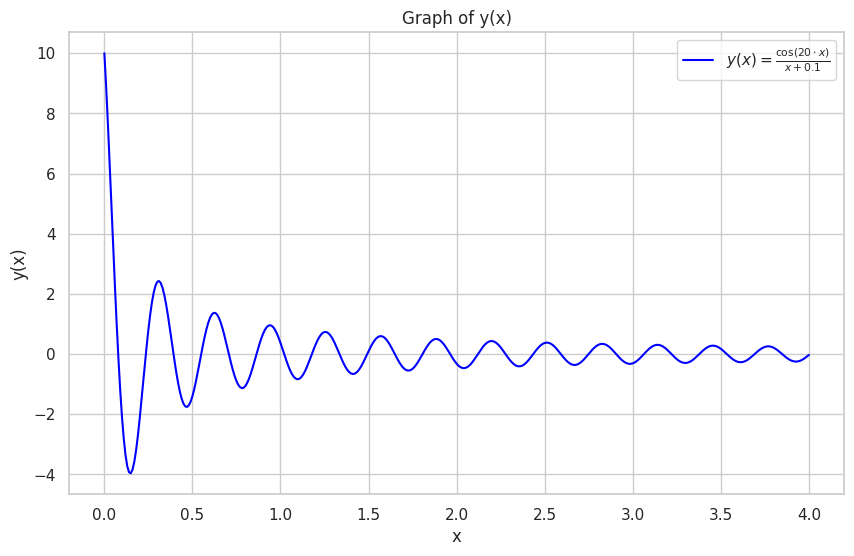

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

def plot_function():
    # Создаем массив данных для x с шагом 0.01 в диапазоне [0, 4]
    x = np.arange(0, 4.01, 0.01)

    # Определяем функцию y(x)
    y = np.cos(20 * x) / (x + 0.1)

    # Создаем график
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=r"$y(x) = \frac{\cos(20 \cdot x)}{x + 0.1}$", color='blue')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title('Graph of y(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_function()

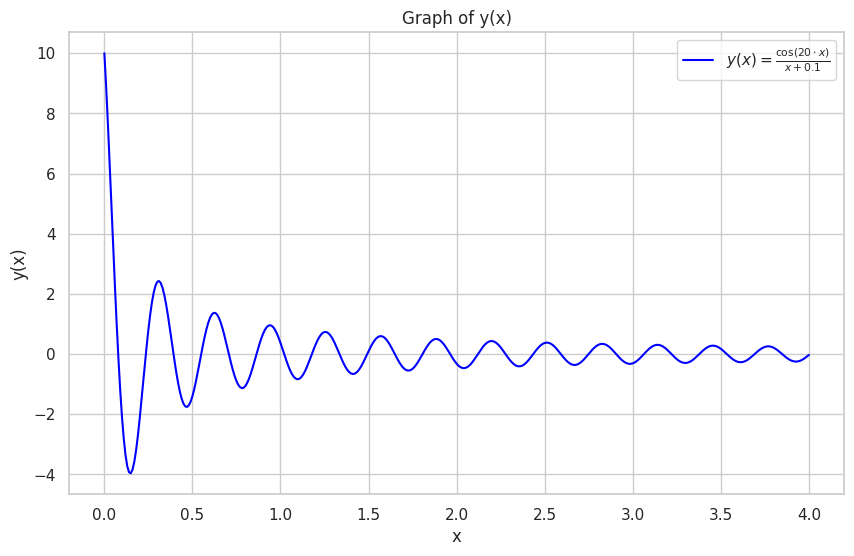

In [7]:
def plot_function_seaborn():
    x = np.arange(0, 4.01, 0.01)

    y = np.cos(20 * x) / (x + 0.1)

    # Создаем DataFrame для удобства работы с seaborn
    data = pd.DataFrame({'x': x, 'y': y})

    # Настройка стиля графика
    sns.set(style="whitegrid")

    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='x', y='y', color='blue', label=r"$y(x) = \frac{\cos(20 \cdot x)}{x + 0.1}$")
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title('Graph of y(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_function_seaborn()

In [6]:
def plot_function_plotly():
    x = np.arange(0, 4.01, 0.01)

    y = np.cos(20 * x) / (x + 0.1)

    # Создаем график с использованием plotly
    fig = go.Figure()

    # Добавляем линию графика
    fig.add_trace(go.Scatter(
        x=x, y=y,
        mode='lines',
        name=r"$y(x) = \frac{\cos(20 \cdot x)}{x + 0.1}$",
        line=dict(color='blue')
    ))

    # Настройки графика
    fig.update_layout(
        title="Graph of y(x)",
        xaxis_title="x",
        yaxis_title="y(x)",
        template="plotly_white",
        legend=dict(
            x=0.02, y=0.98,  # Позиция легенды
            bgcolor="rgba(255, 255, 255, 0.8)",
            bordercolor="black",
            borderwidth=1
        )
    )

    fig.show()

plot_function_plotly()

### Задача 2.

In [17]:
df = pd.read_csv('car_data.csv', header=0, sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5001 non-null   int64 
 1   Car_id         5001 non-null   object
 2   Date           5001 non-null   object
 3   Customer Name  5001 non-null   object
 4   Gender         5001 non-null   object
 5   Annual Income  5001 non-null   int64 
 6   Dealer_Name    4929 non-null   object
 7   Company        4929 non-null   object
 8   Model          5001 non-null   object
 9   Engine         5001 non-null   object
 10  Transmission   5001 non-null   object
 11  Color          5001 non-null   object
 12  Price ($)      5001 non-null   int64 
 13  Dealer_No      5001 non-null   object
 14  Body Style     5001 non-null   object
 15  Phone          5001 non-null   int64 
 16  Dealer_Region  5001 non-null   object
dtypes: int64(4), object(13)
memory usage: 664.3+ KB


<ipython-input-19-d0da16ea626f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




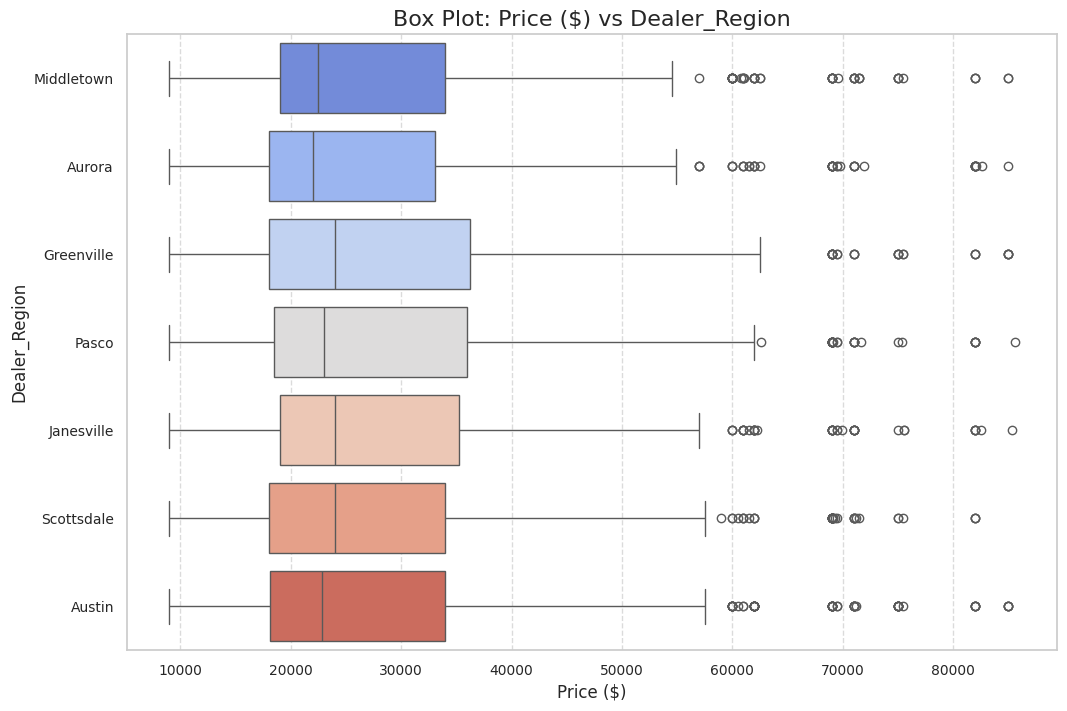

In [19]:
# Числовой признак - "Price ($)", категориальный - "Dealer_Region"
def visualize_box_plot(df, numerical_col, categorical_col):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))

    sns.boxplot(
        x=numerical_col,
        y=categorical_col,
        data=df,
        palette="coolwarm",
        orient="h"
    )

    plt.title(f"Box Plot: {numerical_col} vs {categorical_col}", fontsize=16)
    plt.xlabel(numerical_col, fontsize=12)
    plt.ylabel(categorical_col, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

visualize_box_plot(df, numerical_col="Price ($)", categorical_col="Dealer_Region")

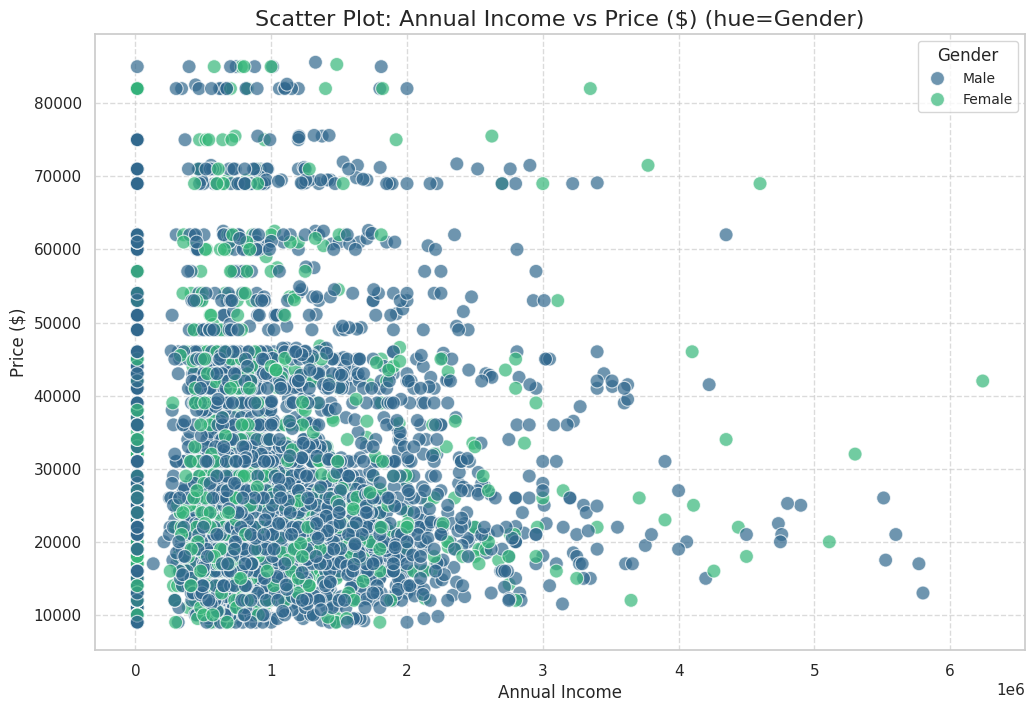

In [20]:
# Числовые признаки - "Price ($)" и "Annual Income", категориальный - "Gender"
def visualize_scatter_plot(df, x_col, y_col, hue_col):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))

    scatter = sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        hue=hue_col,
        palette="viridis",
        alpha=0.7,
        s=100
    )

    plt.title(f"Scatter Plot: {x_col} vs {y_col} (hue={hue_col})", fontsize=16)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.legend(title=hue_col, fontsize=10, title_fontsize=12, loc='best')
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

visualize_scatter_plot(
    df=df,
    x_col="Annual Income",
    y_col="Price ($)",
    hue_col="Gender"
)

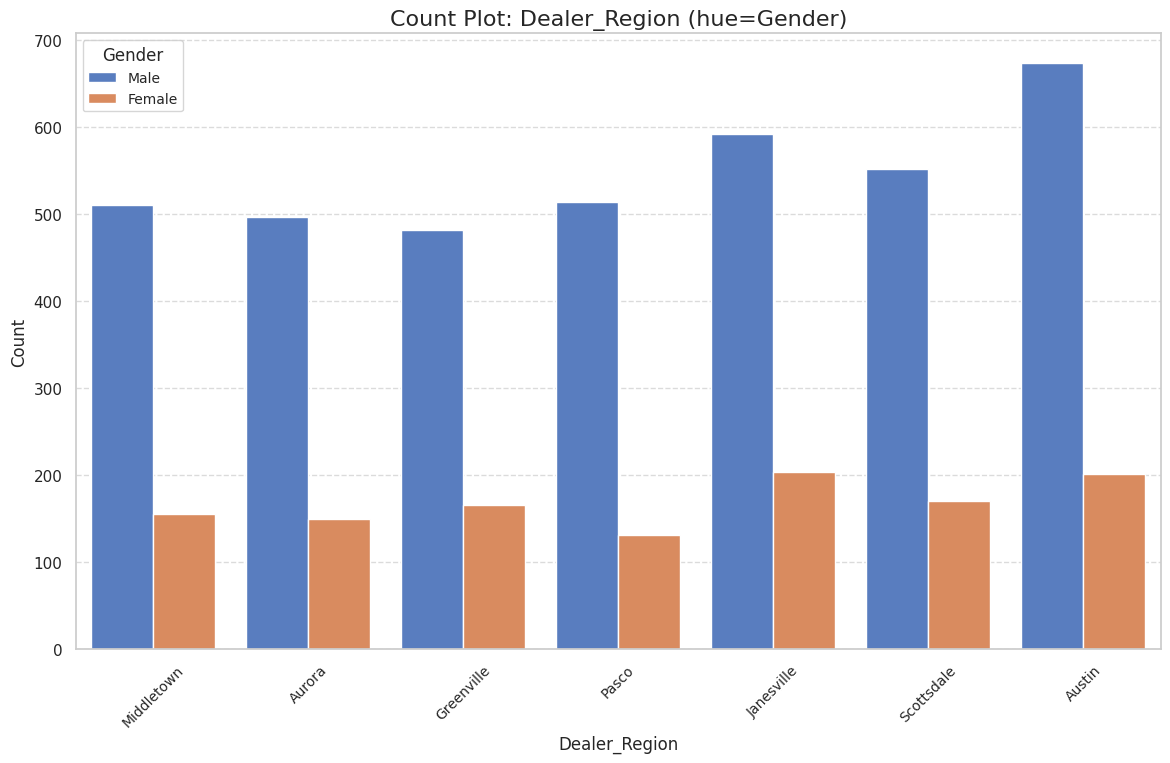

In [21]:
# Категориальные признаки - "Gender" и "Dealer_Region"
def visualize_count_plot(df, x_col, hue_col):
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))

    sns.countplot(
        data=df,
        x=x_col,
        hue=hue_col,
        palette="muted"
    )

    plt.title(f"Count Plot: {x_col} (hue={hue_col})", fontsize=16)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title=hue_col, fontsize=10, title_fontsize=12, loc='best')
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

visualize_count_plot(
    df=df,
    x_col="Dealer_Region",
    hue_col="Gender"
)

### Задача 3.

In [25]:
import requests

url = 'https://image.winudf.com/v2/image/Y29tLnJldjAzMDMubHdwX3NjcmVlbl8wXzE1MzgwODA4NzZfMDU2/screen-0.jpg?h=500&fakeurl=1&type=.jpg'

# Загрузка и сохранение изображения
with requests.get(url, stream=True) as response:
    response.raise_for_status()
    with open('kitty.jpg', 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)

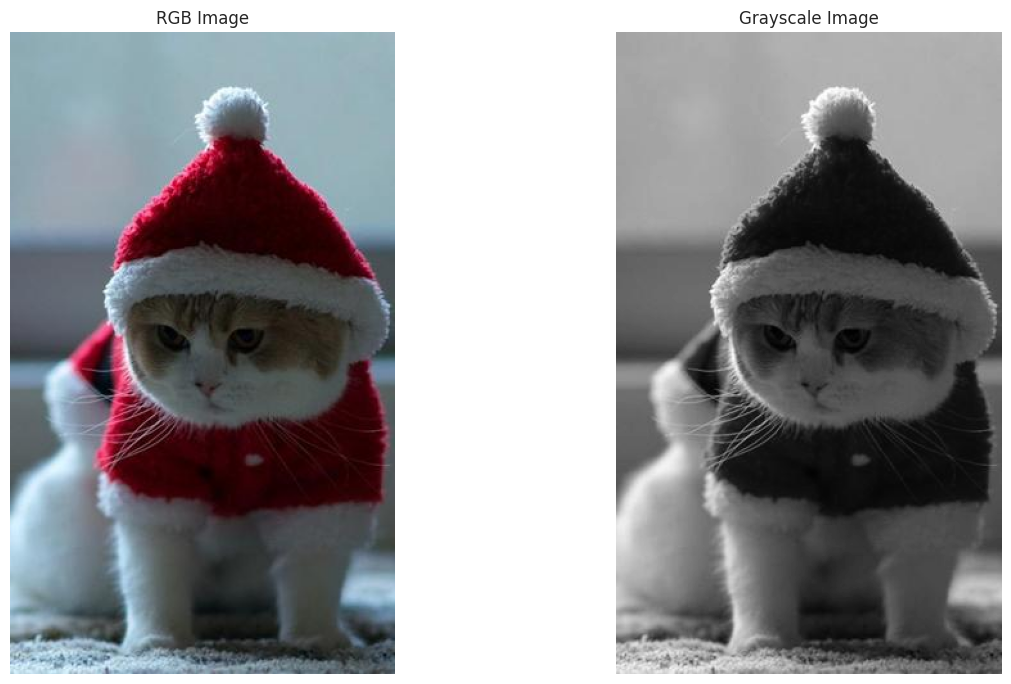

In [27]:
from PIL import Image

image = Image.open('kitty.jpg')
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Отображение изображения в RGB (цветное изображение)
axes[0].imshow(image)
axes[0].set_title('RGB Image')
axes[0].axis('off')

# Преобразование в градации серого
image_gray = image.convert("L")

# Отображение изображения в градациях серого
axes[1].imshow(image_gray, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()